In [55]:
#import pandas and numpy libraries 
import pandas as pd
import numpy as np 

#import preproscessing implementations
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split


from sklearn.pipeline import make_pipeline

#models predictive models 
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

In [68]:
pip install pandas_ml

     |████████████████████████████████| 100 kB 562 kB/s ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv("./clean_covid_data.csv") # read in dataframe

In [3]:
df.head(10) # first 10 rows of dataframe 

,date,county,fips,place,confirmed_cases,note,x,y,log_cases,category,ordinal_cat
0,2020-10-23,Sonoma,97.0,Bodega,1,10 or fewer,-122.973889,38.345278,0.0,0,0
1,2020-07-02,Plumas,63.0,Indian Valley,1,NaN,-120.885787,40.081003,0.0,0,0
2,2020-06-24,Nevada,57.0,95927,1,9 or fewer,-121.940086,39.809273,0.0,0,0
3,2020-04-07,Riverside,65.0,Indio Hills,1,NaN,-116.231396,33.831128,0.0,0,0
4,2020-10-23,Marin,41.0,Inverness,1,9 or fewer,-122.857675,38.101176,0.0,0,0
5,2020-07-02,Plumas,63.0,Chester/Lake Almanor,1,NaN,-121.234722,40.302500,0.0,0,0
6,2020-05-06,Kern,29.0,Maricopa,1,NaN,-119.400833,35.058889,0.0,0,0
7,2020-06-24,Nevada,57.0,95978,1,9 or fewer,-121.525915,39.906141,0.0,0,0
8,2020-03-25,Los Angeles,37.0,Athens,1,NaN,-118.303000,33.923480,0.0,0,0
9,2020-06-23,Calaveras,9.0,Angels Camp,1,NaN,-120.551979,38.074667,0.0,0,0


In [84]:
df.category.value_counts(normalize = True)

2    0.314523
3    0.301245
1    0.207469
0    0.125311
4    0.051452
Name: category, dtype: float64

I. Baseline Models that will only Incorporate Longitude and Lattitude in Feature Space

I. a) Support Vector Machine

In [4]:
X = df.iloc[:,6:8] # assign features
y = df.category # assign output 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y  ,random_state = 42 ) # partion data into training and testing sets 

In [11]:
clf = svm.SVC() #instantiate Support Vector Machine 

In [12]:
clf.fit(X_train, y_train) # fit the training data 

SVC()

In [13]:
clf.score(X_train, y_train) 

0.31118493909191586

In [14]:
clf.score(X_test, y_test)

0.32450331125827814

In [15]:
from sklearn.metrics import confusion_matrix #import confusion matrix

In [16]:
preds = clf.predict(X_test) # predictions

In [17]:
confusion = confusion_matrix(y_test, preds)

In [18]:
confusion # confusion matrix

array([[ 0,  0, 37,  0,  0],
       [ 0,  0, 67,  0,  0],
       [ 0,  0, 98,  0,  0],
       [ 0,  0, 88,  0,  0],
       [ 0,  0, 12,  0,  0]])

In [31]:
from sklearn.metrics import plot_confusion_matrix

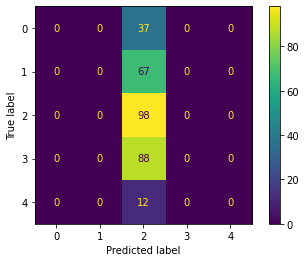

In [34]:
plot_confusion_matrix(clf, X_test, y_test);

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, preds)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, preds, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, preds, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test,preds, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, preds, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, preds, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, preds, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, preds, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, preds, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, preds, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, preds, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']))

# metrics 


Accuracy: 0.32

Micro Precision: 0.32
Micro Recall: 0.32
Micro F1-score: 0.32

Macro Precision: 0.06
Macro Recall: 0.20
Macro F1-score: 0.10

Weighted Precision: 0.11
Weighted Recall: 0.32
Weighted F1-score: 0.16

Classification Report

              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00        37
     Class 2       0.00      0.00      0.00        67
     Class 3       0.32      1.00      0.49        98
     Class 4       0.00      0.00      0.00        88
     Class 5       0.00      0.00      0.00        12

    accuracy                           0.32       302
   macro avg       0.06      0.20      0.10       302
weighted avg       0.11      0.32      0.16       302



/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Baseline model is poor because it only predicts for Class 3

In [ ]:
I. b) Logistic Regression without Categorical Features #logisitc regression 

In [109]:
logisticr = LogisticRegression(solver = "newton-cg",max_iter= 500, penalty = "l2", C = 0.0001, verbose = 3) #newton solveer

In [40]:
logisticr.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [41]:
logisticr.score(X_train, y_train)

0.327796234772979

In [42]:
logisticr.score(X_test, y_test)

0.3708609271523179

II. Predictive Models that incorporates County, Longitude, and Latitude Features

II. a) Logistic Regression

In [43]:
enc = OneHotEncoder(handle_unknown='ignore') # instantiate one hot encoder 

In [44]:
county = pd.DataFrame(df.county)

In [48]:
county = pd.DataFrame(enc.fit_transform(county).toarray()) # one hot encoding the categorical features

In [51]:
X = df.iloc[:,6:8]
X = pd.concat([X,county], axis = 1)
y = df["category"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y,random_state = 42 )# partition training and testing data 

In [110]:
logisticr.fit(X_train, y_train)

logisticr.score(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


0.3067552602436323

In [111]:
logisticr.score(X_test, y_test)

0.32450331125827814

In [112]:
preds1 = logisticr.predict(X_test) # assign predictions 

In [114]:
confusion = confusion_matrix(y_test, preds1)
confusion

array([[ 0,  0, 34,  4,  0],
       [ 0,  0, 54,  9,  0],
       [ 0,  0, 79, 16,  0],
       [ 0,  0, 72, 19,  0],
       [ 0,  0, 13,  2,  0]])

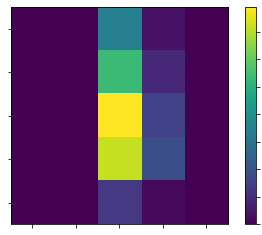

In [116]:
plot_confusion_matrix(logisticr, X_test, y_test);

In [151]:

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, preds1)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, preds1, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, preds1, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test,preds1, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, preds1, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, preds1, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, preds1, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, preds1, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, preds1, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, preds1, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, preds1, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']))


Accuracy: 0.35

Micro Precision: 0.35
Micro Recall: 0.35
Micro F1-score: 0.35

Macro Precision: 0.15
Macro Recall: 0.22
Macro F1-score: 0.16

Weighted Precision: 0.22
Weighted Recall: 0.35
Weighted F1-score: 0.24

Classification Report

              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00        37
     Class 2       0.00      0.00      0.00        67
     Class 3       0.35      0.90      0.50        98
     Class 4       0.38      0.22      0.28        88
     Class 5       0.00      0.00      0.00        12

    accuracy                           0.35       302
   macro avg       0.15      0.22      0.16       302
weighted avg       0.22      0.35      0.24       302



/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


III. a)Random Forests 

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42 ) # train test split 

In [142]:
rforest = RandomForestClassifier(max_depth=5, random_state=0, criterion='gini')

In [143]:
rforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [144]:
rforest.score(X_train, y_train)

0.5149501661129569

In [145]:
rforest.score(X_test, y_test)

0.40728476821192056

In [146]:
preds2 = rforest.predict(X_test)

In [170]:
confusion = confusion_matrix(y_test, preds2)
confusion

array([[ 6,  6, 12, 13,  0],
       [ 0,  6, 31, 30,  0],
       [ 1,  8, 51, 38,  0],
       [ 0,  3, 25, 60,  0],
       [ 0,  0,  3,  9,  0]])

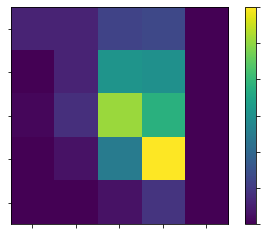

In [171]:
plot_confusion_matrix(rforest, X_test, y_test);

In [152]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, preds)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, preds2, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, preds2, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test,preds2, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, preds2, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, preds2, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, preds2, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, preds2, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, preds2, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, preds2, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, preds2, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']))


Accuracy: 0.32

Micro Precision: 0.41
Micro Recall: 0.41
Micro F1-score: 0.41

Macro Precision: 0.39
Macro Recall: 0.29
Macro F1-score: 0.27

Weighted Precision: 0.42
Weighted Recall: 0.41
Weighted F1-score: 0.36

Classification Report

              precision    recall  f1-score   support

     Class 1       0.86      0.16      0.27        37
     Class 2       0.26      0.09      0.13        67
     Class 3       0.42      0.52      0.46        98
     Class 4       0.40      0.68      0.50        88
     Class 5       0.00      0.00      0.00        12

    accuracy                           0.41       302
   macro avg       0.39      0.29      0.27       302
weighted avg       0.42      0.41      0.36       302



IV. ADABOOST 

In [165]:
ada = AdaBoostClassifier(n_estimators=150, random_state=0) #instantiating ADA boost modell 

In [166]:
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=150, random_state=0)

In [167]:
ada.score(X_train, y_train)

0.4318936877076412

In [168]:
ada.score(X_test, y_test)

0.36423841059602646

In [169]:
preds3 = ada.predict(X_test)

In [172]:
confusion = confusion_matrix(y_test, preds3)
confusion

array([[ 8, 16,  1, 11,  1],
       [ 2, 10, 19, 35,  1],
       [ 6,  9, 34, 48,  1],
       [ 2,  3, 26, 57,  0],
       [ 1,  0,  2,  8,  1]])

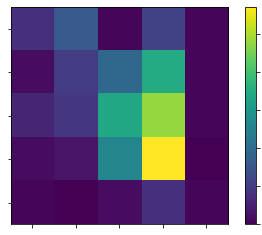

In [174]:
plot_confusion_matrix(ada, X_test, y_test);

In [177]:
ada.predict_proba(X_test)

array([[0.20572948, 0.20765755, 0.20841755, 0.21132775, 0.16686766],
       [0.19655191, 0.20129332, 0.20079664, 0.20172757, 0.19963056],
       [0.20149126, 0.20114444, 0.20221578, 0.1998865 , 0.19526203],
       ...,
       [0.18382184, 0.20349643, 0.20478755, 0.20476786, 0.20312632],
       [0.20476247, 0.20328997, 0.20478794, 0.2023791 , 0.18478052],
       [0.18712495, 0.20266263, 0.20439096, 0.20440346, 0.201418  ]])

In [178]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, preds3)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, preds3, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, preds3, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test,preds3, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, preds3, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, preds3, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, preds3, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, preds3, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, preds3, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, preds3, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, preds3, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']))


Accuracy: 0.36

Micro Precision: 0.36
Micro Recall: 0.36
Micro F1-score: 0.36

Macro Precision: 0.34
Macro Recall: 0.29
Macro F1-score: 0.29

Weighted Precision: 0.36
Weighted Recall: 0.36
Weighted F1-score: 0.34

Classification Report

              precision    recall  f1-score   support

     Class 1       0.42      0.22      0.29        37
     Class 2       0.26      0.15      0.19        67
     Class 3       0.41      0.35      0.38        98
     Class 4       0.36      0.65      0.46        88
     Class 5       0.25      0.08      0.12        12

    accuracy                           0.36       302
   macro avg       0.34      0.29      0.29       302
weighted avg       0.36      0.36      0.34       302



V. Support Vector Machine

In [180]:
pipe = make_pipeline(PCA(random_state = 42),svm.SVC()  )

In [179]:
supportv  =  svm.SVC()  # instantiating support vector machine 

In [181]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(random_state=42)), ('svc', SVC())])

In [182]:
pipe.score(X_train, y_train)

0.42857142857142855

In [183]:
pipe.score(X_test, y_test)

0.3708609271523179

In [185]:
preds4 = pipe.predict(X_test)

In [186]:
confusion = confusion_matrix(y_test, preds4)
confusion

array([[ 5, 10,  7, 15,  0],
       [ 4, 11, 15, 37,  0],
       [ 8, 17, 23, 50,  0],
       [ 0,  3, 12, 73,  0],
       [ 0,  2,  2,  8,  0]])

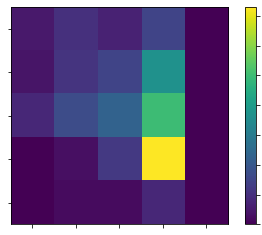

In [188]:
plot_confusion_matrix(pipe, X_test, y_test);

In [57]:
pca = PCA(random_state = 42)

In [60]:
imp_mode = SimpleImputer(strategy="most_frequent", add_indicator=True)#impute 
ohe = OneHotEncoder(handle_unknown='ignore') 

In [61]:
cat_cols = make_column_selector(dtype_exclude='number') 

In [62]:
preprocessor = make_column_transformer(
   
    (make_pipeline(imp_mode, ohe), cat_cols)
)

In [63]:
pipe =  make_pipeline(preprocessor,pca ,LogisticRegression())

In [79]:
param_grid =  {
     'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}  
  

In [82]:
grid = GridSearchCV(LogisticRegression(), param_grid, verbose = 3)

In [83]:
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV]  C=0.0001, penalty=l1, solver=liblinear, score=0.315, total=   0.0s
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV]  C=0.0001, penalty=l1, solver=liblinear, score=0.315, total=   0.0s
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV]  C=0.0001, penalty=l1, solver=liblinear, score=0.315, total=   0.0s
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV]  C=0.0001, penalty=l1, solver=liblinear, score=0.317, total=   0.0s
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV]  C=0.0001, penalty=l1, solver=liblinear, score=0.311, total=   0.0s
[CV] C=0.0001, penalty=l2, solver=liblinear ..........................
[CV]  C=0.0001, penalty=l2, solver=liblinear, score=0.315, total=   0.0s
[CV] C=0.0001, penalty=l2, solver=liblinear ..........................
[CV

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.00026366508987303583, penalty=l1, solver=liblinear, score=0.315, total=   0.0s
[CV] C=0.00026366508987303583, penalty=l1, solver=liblinear ..........
[CV]  C=0.00026366508987303583, penalty=l1, solver=liblinear, score=0.315, total=   0.0s
[CV] C=0.00026366508987303583, penalty=l1, solver=liblinear ..........
[CV]  C=0.00026366508987303583, penalty=l1, solver=liblinear, score=0.317, total=   0.0s
[CV] C=0.00026366508987303583, penalty=l1, solver=liblinear ..........
[CV]  C=0.00026366508987303583, penalty=l1, solver=liblinear, score=0.311, total=   0.0s
[CV] C=0.00026366508987303583, penalty=l2, solver=liblinear ..........
[CV]  C=0.00026366508987303583, penalty=l2, solver=liblinear, score=0.315, total=   0.0s
[CV] C=0.00026366508987303583, penalty=l2, solver=liblinear ..........
[CV]  C=0.00026366508987303583, penalty=l2, solver=liblinear, score=0.315, total=   0.0s
[CV] C=0.00026366508987303583, penalty=l2, solver=liblinear ..........
[CV]  C=0.00026366508987303583, penalty=

/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=0.012742749857031334, penalty=l2, solver=liblinear, score=0.344, total=   0.0s
[CV] C=0.012742749857031334, penalty=l2, solver=liblinear ............
[CV]  C=0.012742749857031334, penalty=l2, solver=liblinear, score=0.372, total=   0.0s
[CV] C=0.03359818286283781, penalty=l1, solver=liblinear .............
[CV]  C=0.03359818286283781, penalty=l1, solver=liblinear, score=0.348, total=   0.0s
[CV] C=0.03359818286283781, penalty=l1, solver=liblinear .............
[CV]  C=0.03359818286283781, penalty=l1, solver=liblinear, score=0.315, total=   0.0s
[CV] C=0.03359818286283781, penalty=l1, solver=liblinear .............
[CV]  C=0.03359818286283781, penalty=l1, solver=liblinear, score=0.370, total=   0.0s
[CV] C=0.03359818286283781, penalty=l1, solver=liblinear .............
[CV]  C=0.03359818286283781, penalty=l1, solver=liblinear, score=0.322, total=   0.0s
[CV] C=0.03359818286283781, penalty=l1, solver=liblinear .............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=0.03359818286283781, penalty=l1, solver=liblinear, score=0.328, total=   0.0s
[CV] C=0.03359818286283781, penalty=l2, solver=liblinear .............
[CV]  C=0.03359818286283781, penalty=l2, solver=liblinear, score=0.337, total=   0.0s
[CV] C=0.03359818286283781, penalty=l2, solver=liblinear .............
[CV]  C=0.03359818286283781, penalty=l2, solver=liblinear, score=0.387, total=   0.0s
[CV] C=0.03359818286283781, penalty=l2, solver=liblinear .............
[CV]  C=0.03359818286283781, penalty=l2, solver=liblinear, score=0.331, total=   0.0s
[CV] C=0.03359818286283781, penalty=l2, solver=liblinear .............
[CV]  C=0.03359818286283781, penalty=l2, solver=liblinear, score=0.328, total=   0.0s
[CV] C=0.03359818286283781, penalty=l2, solver=liblinear .............
[CV]  C=0.03359818286283781, penalty=l2, solver=liblinear, score=0.372, total=   0.0s
[CV] C=0.08858667904100823, penalty=l1, solver=liblinear .............
[CV]  C=0.08858667904100823, penalty=l1, solver=liblinear,

/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: Converge

[CV]  C=0.08858667904100823, penalty=l1, solver=liblinear, score=0.381, total=   0.0s
[CV] C=0.08858667904100823, penalty=l1, solver=liblinear .............
[CV]  C=0.08858667904100823, penalty=l1, solver=liblinear, score=0.320, total=   0.1s
[CV] C=0.08858667904100823, penalty=l1, solver=liblinear .............
[CV]  C=0.08858667904100823, penalty=l1, solver=liblinear, score=0.306, total=   0.1s
[CV] C=0.08858667904100823, penalty=l1, solver=liblinear .............
[CV]  C=0.08858667904100823, penalty=l1, solver=liblinear, score=0.339, total=   0.1s
[CV] C=0.08858667904100823, penalty=l2, solver=liblinear .............
[CV]  C=0.08858667904100823, penalty=l2, solver=liblinear, score=0.331, total=   0.0s
[CV] C=0.08858667904100823, penalty=l2, solver=liblinear .............
[CV]  C=0.08858667904100823, penalty=l2, solver=liblinear, score=0.387, total=   0.0s
[CV] C=0.08858667904100823, penalty=l2, solver=liblinear .............
[CV]  C=0.08858667904100823, penalty=l2, solver=liblinear,

/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=0.23357214690901212, penalty=l1, solver=liblinear, score=0.343, total=   0.1s
[CV] C=0.23357214690901212, penalty=l1, solver=liblinear .............
[CV]  C=0.23357214690901212, penalty=l1, solver=liblinear, score=0.392, total=   0.1s
[CV] C=0.23357214690901212, penalty=l1, solver=liblinear .............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=0.23357214690901212, penalty=l1, solver=liblinear, score=0.315, total=   0.1s
[CV] C=0.23357214690901212, penalty=l1, solver=liblinear .............
[CV]  C=0.23357214690901212, penalty=l1, solver=liblinear, score=0.328, total=   0.2s
[CV] C=0.23357214690901212, penalty=l1, solver=liblinear .............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=0.23357214690901212, penalty=l1, solver=liblinear, score=0.361, total=   0.2s
[CV] C=0.23357214690901212, penalty=l2, solver=liblinear .............
[CV]  C=0.23357214690901212, penalty=l2, solver=liblinear, score=0.320, total=   0.0s
[CV] C=0.23357214690901212, penalty=l2, solver=liblinear .............
[CV]  C=0.23357214690901212, penalty=l2, solver=liblinear, score=0.337, total=   0.0s
[CV] C=0.23357214690901212, penalty=l2, solver=liblinear .............
[CV]  C=0.23357214690901212, penalty=l2, solver=liblinear, score=0.354, total=   0.0s
[CV] C=0.23357214690901212, penalty=l2, solver=liblinear .............
[CV]  C=0.23357214690901212, penalty=l2, solver=liblinear, score=0.311, total=   0.0s
[CV] C=0.23357214690901212, penalty=l2, solver=liblinear .............
[CV]  C=0.23357214690901212, penalty=l2, solver=liblinear, score=0.350, total=   0.0s
[CV] C=0.615848211066026, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=0.615848211066026, penalty=l1, solver=liblinear, score=0.276, total=   1.0s
[CV] C=0.615848211066026, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=0.615848211066026, penalty=l1, solver=liblinear, score=0.354, total=   1.1s
[CV] C=0.615848211066026, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=0.615848211066026, penalty=l1, solver=liblinear, score=0.337, total=   0.8s
[CV] C=0.615848211066026, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=0.615848211066026, penalty=l1, solver=liblinear, score=0.311, total=   2.6s
[CV] C=0.615848211066026, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=0.615848211066026, penalty=l1, solver=liblinear, score=0.344, total=   1.8s
[CV] C=0.615848211066026, penalty=l2, solver=liblinear ...............
[CV]  C=0.615848211066026, penalty=l2, solver=liblinear, score=0.315, total=   0.1s
[CV] C=0.615848211066026, penalty=l2, solver=liblinear ...............
[CV]  C=0.615848211066026, penalty=l2, solver=liblinear, score=0.326, total=   0.0s
[CV] C=0.615848211066026, penalty=l2, solver=liblinear ...............
[CV]  C=0.615848211066026, penalty=l2, solver=liblinear, score=0.354, total=   0.0s
[CV] C=0.615848211066026, penalty=l2, solver=liblinear ...............
[CV]  C=0.615848211066026, penalty=l2, solver=liblinear, score=0.333, total=   0.1s
[CV] C=0.615848211066026, penalty=l2, solver=liblinear ...............
[CV]  C=0.615848211066026, penalty=l2, solver=liblinear, score=0.350, total=   0.1s
[CV] C=1.623776739188721, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1.623776739188721, penalty=l1, solver=liblinear, score=0.309, total=  10.1s
[CV] C=1.623776739188721, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1.623776739188721, penalty=l1, solver=liblinear, score=0.331, total=   8.1s
[CV] C=1.623776739188721, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1.623776739188721, penalty=l1, solver=liblinear, score=0.343, total=   6.9s
[CV] C=1.623776739188721, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1.623776739188721, penalty=l1, solver=liblinear, score=0.339, total=   5.6s
[CV] C=1.623776739188721, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1.623776739188721, penalty=l1, solver=liblinear, score=0.361, total=   4.6s
[CV] C=1.623776739188721, penalty=l2, solver=liblinear ...............
[CV]  C=1.623776739188721, penalty=l2, solver=liblinear, score=0.315, total=   0.0s
[CV] C=1.623776739188721, penalty=l2, solver=liblinear ...............
[CV]  C=1.623776739188721, penalty=l2, solver=liblinear, score=0.326, total=   0.0s
[CV] C=1.623776739188721, penalty=l2, solver=liblinear ...............
[CV]  C=1.623776739188721, penalty=l2, solver=liblinear, score=0.359, total=   0.0s
[CV] C=1.623776739188721, penalty=l2, solver=liblinear ...............
[CV]  C=1.623776739188721, penalty=l2, solver=liblinear, score=0.328, total=   0.0s
[CV] C=1.623776739188721, penalty=l2, solver=liblinear ...............
[CV]  C=1.623776739188721, penalty=l2, solver=liblinear, score=0.350, total=   0.0s
[CV] C=4.281332398719396, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=4.281332398719396, penalty=l1, solver=liblinear, score=0.315, total=  11.5s
[CV] C=4.281332398719396, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=4.281332398719396, penalty=l1, solver=liblinear, score=0.354, total=   8.9s
[CV] C=4.281332398719396, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=4.281332398719396, penalty=l1, solver=liblinear, score=0.331, total=  10.4s
[CV] C=4.281332398719396, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=4.281332398719396, penalty=l1, solver=liblinear, score=0.344, total=   8.8s
[CV] C=4.281332398719396, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=4.281332398719396, penalty=l1, solver=liblinear, score=0.361, total=  11.2s
[CV] C=4.281332398719396, penalty=l2, solver=liblinear ...............
[CV]  C=4.281332398719396, penalty=l2, solver=liblinear, score=0.304, total=   0.0s
[CV] C=4.281332398719396, penalty=l2, solver=liblinear ...............
[CV]  C=4.281332398719396, penalty=l2, solver=liblinear, score=0.331, total=   0.0s
[CV] C=4.281332398719396, penalty=l2, solver=liblinear ...............
[CV]  C=4.281332398719396, penalty=l2, solver=liblinear, score=0.359, total=   0.0s
[CV] C=4.281332398719396, penalty=l2, solver=liblinear ...............
[CV]  C=4.281332398719396, penalty=l2, solver=liblinear, score=0.328, total=   0.0s
[CV] C=4.281332398719396, penalty=l2, solver=liblinear ...............
[CV]  C=4.281332398719396, penalty=l2, solver=liblinear, score=0.367, total=   0.0s
[CV] C=11.288378916846883, penalty=l1, solver=liblinear ..............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=11.288378916846883, penalty=l1, solver=liblinear, score=0.309, total=  14.6s
[CV] C=11.288378916846883, penalty=l1, solver=liblinear ..............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=11.288378916846883, penalty=l1, solver=liblinear, score=0.331, total=  11.1s
[CV] C=11.288378916846883, penalty=l1, solver=liblinear ..............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=11.288378916846883, penalty=l1, solver=liblinear, score=0.348, total=  14.9s
[CV] C=11.288378916846883, penalty=l1, solver=liblinear ..............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=11.288378916846883, penalty=l1, solver=liblinear, score=0.344, total=  11.5s
[CV] C=11.288378916846883, penalty=l1, solver=liblinear ..............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=11.288378916846883, penalty=l1, solver=liblinear, score=0.356, total=  11.5s
[CV] C=11.288378916846883, penalty=l2, solver=liblinear ..............
[CV]  C=11.288378916846883, penalty=l2, solver=liblinear, score=0.309, total=   0.0s
[CV] C=11.288378916846883, penalty=l2, solver=liblinear ..............
[CV]  C=11.288378916846883, penalty=l2, solver=liblinear, score=0.337, total=   0.0s
[CV] C=11.288378916846883, penalty=l2, solver=liblinear ..............
[CV]  C=11.288378916846883, penalty=l2, solver=liblinear, score=0.359, total=   0.0s
[CV] C=11.288378916846883, penalty=l2, solver=liblinear ..............
[CV]  C=11.288378916846883, penalty=l2, solver=liblinear, score=0.339, total=   0.0s
[CV] C=11.288378916846883, penalty=l2, solver=liblinear ..............
[CV]  C=11.288378916846883, penalty=l2, solver=liblinear, score=0.356, total=   0.0s
[CV] C=29.763514416313132, penalty=l1, solver=liblinear ..............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=29.763514416313132, penalty=l1, solver=liblinear, score=0.309, total=  17.1s
[CV] C=29.763514416313132, penalty=l1, solver=liblinear ..............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=29.763514416313132, penalty=l1, solver=liblinear, score=0.326, total=  16.4s
[CV] C=29.763514416313132, penalty=l1, solver=liblinear ..............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=29.763514416313132, penalty=l1, solver=liblinear, score=0.354, total=  18.4s
[CV] C=29.763514416313132, penalty=l1, solver=liblinear ..............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=29.763514416313132, penalty=l1, solver=liblinear, score=0.333, total=  14.5s
[CV] C=29.763514416313132, penalty=l1, solver=liblinear ..............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=29.763514416313132, penalty=l1, solver=liblinear, score=0.356, total=  11.5s
[CV] C=29.763514416313132, penalty=l2, solver=liblinear ..............
[CV]  C=29.763514416313132, penalty=l2, solver=liblinear, score=0.304, total=   0.0s
[CV] C=29.763514416313132, penalty=l2, solver=liblinear ..............
[CV]  C=29.763514416313132, penalty=l2, solver=liblinear, score=0.337, total=   0.0s
[CV] C=29.763514416313132, penalty=l2, solver=liblinear ..............
[CV]  C=29.763514416313132, penalty=l2, solver=liblinear, score=0.337, total=   0.0s
[CV] C=29.763514416313132, penalty=l2, solver=liblinear ..............
[CV]  C=29.763514416313132, penalty=l2, solver=liblinear, score=0.356, total=   0.0s
[CV] C=29.763514416313132, penalty=l2, solver=liblinear ..............
[CV]  C=29.763514416313132, penalty=l2, solver=liblinear, score=0.350, total=   0.0s
[CV] C=78.47599703514607, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=78.47599703514607, penalty=l1, solver=liblinear, score=0.309, total=  16.4s
[CV] C=78.47599703514607, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=78.47599703514607, penalty=l1, solver=liblinear, score=0.326, total=  17.2s
[CV] C=78.47599703514607, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=78.47599703514607, penalty=l1, solver=liblinear, score=0.348, total=  16.1s
[CV] C=78.47599703514607, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=78.47599703514607, penalty=l1, solver=liblinear, score=0.328, total=  12.7s
[CV] C=78.47599703514607, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=78.47599703514607, penalty=l1, solver=liblinear, score=0.350, total=  16.8s
[CV] C=78.47599703514607, penalty=l2, solver=liblinear ...............
[CV]  C=78.47599703514607, penalty=l2, solver=liblinear, score=0.304, total=   0.0s
[CV] C=78.47599703514607, penalty=l2, solver=liblinear ...............
[CV]  C=78.47599703514607, penalty=l2, solver=liblinear, score=0.331, total=   0.0s
[CV] C=78.47599703514607, penalty=l2, solver=liblinear ...............
[CV]  C=78.47599703514607, penalty=l2, solver=liblinear, score=0.348, total=   0.0s
[CV] C=78.47599703514607, penalty=l2, solver=liblinear ...............
[CV]  C=78.47599703514607, penalty=l2, solver=liblinear, score=0.356, total=   0.0s
[CV] C=78.47599703514607, penalty=l2, solver=liblinear ...............
[CV]  C=78.47599703514607, penalty=l2, solver=liblinear, score=0.344, total=   0.1s
[CV] C=206.913808111479, penalty=l1, solver=liblinear ................


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=206.913808111479, penalty=l1, solver=liblinear, score=0.309, total=  15.3s
[CV] C=206.913808111479, penalty=l1, solver=liblinear ................


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=206.913808111479, penalty=l1, solver=liblinear, score=0.331, total=  16.9s
[CV] C=206.913808111479, penalty=l1, solver=liblinear ................


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=206.913808111479, penalty=l1, solver=liblinear, score=0.359, total=  16.2s
[CV] C=206.913808111479, penalty=l1, solver=liblinear ................


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=206.913808111479, penalty=l1, solver=liblinear, score=0.333, total=  15.5s
[CV] C=206.913808111479, penalty=l1, solver=liblinear ................


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=206.913808111479, penalty=l1, solver=liblinear, score=0.350, total=  16.9s
[CV] C=206.913808111479, penalty=l2, solver=liblinear ................
[CV]  C=206.913808111479, penalty=l2, solver=liblinear, score=0.304, total=   0.1s
[CV] C=206.913808111479, penalty=l2, solver=liblinear ................
[CV]  C=206.913808111479, penalty=l2, solver=liblinear, score=0.320, total=   0.1s
[CV] C=206.913808111479, penalty=l2, solver=liblinear ................
[CV]  C=206.913808111479, penalty=l2, solver=liblinear, score=0.343, total=   0.1s
[CV] C=206.913808111479, penalty=l2, solver=liblinear ................
[CV]  C=206.913808111479, penalty=l2, solver=liblinear, score=0.356, total=   0.1s
[CV] C=206.913808111479, penalty=l2, solver=liblinear ................
[CV]  C=206.913808111479, penalty=l2, solver=liblinear, score=0.339, total=   0.1s
[CV] C=545.5594781168514, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=545.5594781168514, penalty=l1, solver=liblinear, score=0.315, total=  16.8s
[CV] C=545.5594781168514, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=545.5594781168514, penalty=l1, solver=liblinear, score=0.331, total=  18.3s
[CV] C=545.5594781168514, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=545.5594781168514, penalty=l1, solver=liblinear, score=0.348, total=  18.1s
[CV] C=545.5594781168514, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=545.5594781168514, penalty=l1, solver=liblinear, score=0.344, total=  14.4s
[CV] C=545.5594781168514, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=545.5594781168514, penalty=l1, solver=liblinear, score=0.344, total=  15.9s
[CV] C=545.5594781168514, penalty=l2, solver=liblinear ...............
[CV]  C=545.5594781168514, penalty=l2, solver=liblinear, score=0.298, total=   0.0s
[CV] C=545.5594781168514, penalty=l2, solver=liblinear ...............
[CV]  C=545.5594781168514, penalty=l2, solver=liblinear, score=0.315, total=   0.0s
[CV] C=545.5594781168514, penalty=l2, solver=liblinear ...............
[CV]  C=545.5594781168514, penalty=l2, solver=liblinear, score=0.337, total=   0.0s
[CV] C=545.5594781168514, penalty=l2, solver=liblinear ...............
[CV]  C=545.5594781168514, penalty=l2, solver=liblinear, score=0.361, total=   0.0s
[CV] C=545.5594781168514, penalty=l2, solver=liblinear ...............
[CV]  C=545.5594781168514, penalty=l2, solver=liblinear, score=0.333, total=   0.1s
[CV] C=1438.44988828766, penalty=l1, solver=liblinear ................


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1438.44988828766, penalty=l1, solver=liblinear, score=0.309, total=  21.9s
[CV] C=1438.44988828766, penalty=l1, solver=liblinear ................


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1438.44988828766, penalty=l1, solver=liblinear, score=0.337, total=  15.8s
[CV] C=1438.44988828766, penalty=l1, solver=liblinear ................


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1438.44988828766, penalty=l1, solver=liblinear, score=0.348, total=  19.0s
[CV] C=1438.44988828766, penalty=l1, solver=liblinear ................


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1438.44988828766, penalty=l1, solver=liblinear, score=0.339, total=  18.6s
[CV] C=1438.44988828766, penalty=l1, solver=liblinear ................


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1438.44988828766, penalty=l1, solver=liblinear, score=0.344, total=  17.1s
[CV] C=1438.44988828766, penalty=l2, solver=liblinear ................
[CV]  C=1438.44988828766, penalty=l2, solver=liblinear, score=0.304, total=   0.1s
[CV] C=1438.44988828766, penalty=l2, solver=liblinear ................
[CV]  C=1438.44988828766, penalty=l2, solver=liblinear, score=0.326, total=   0.1s
[CV] C=1438.44988828766, penalty=l2, solver=liblinear ................
[CV]  C=1438.44988828766, penalty=l2, solver=liblinear, score=0.337, total=   0.1s
[CV] C=1438.44988828766, penalty=l2, solver=liblinear ................
[CV]  C=1438.44988828766, penalty=l2, solver=liblinear, score=0.344, total=   0.0s
[CV] C=1438.44988828766, penalty=l2, solver=liblinear ................
[CV]  C=1438.44988828766, penalty=l2, solver=liblinear, score=0.328, total=   0.1s
[CV] C=3792.690190732246, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=3792.690190732246, penalty=l1, solver=liblinear, score=0.309, total=  19.5s
[CV] C=3792.690190732246, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=3792.690190732246, penalty=l1, solver=liblinear, score=0.348, total=  17.9s
[CV] C=3792.690190732246, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=3792.690190732246, penalty=l1, solver=liblinear, score=0.348, total=  19.3s
[CV] C=3792.690190732246, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=3792.690190732246, penalty=l1, solver=liblinear, score=0.333, total=  17.3s
[CV] C=3792.690190732246, penalty=l1, solver=liblinear ...............


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=3792.690190732246, penalty=l1, solver=liblinear, score=0.339, total=  19.8s
[CV] C=3792.690190732246, penalty=l2, solver=liblinear ...............
[CV]  C=3792.690190732246, penalty=l2, solver=liblinear, score=0.304, total=   0.0s
[CV] C=3792.690190732246, penalty=l2, solver=liblinear ...............
[CV]  C=3792.690190732246, penalty=l2, solver=liblinear, score=0.326, total=   0.1s
[CV] C=3792.690190732246, penalty=l2, solver=liblinear ...............
[CV]  C=3792.690190732246, penalty=l2, solver=liblinear, score=0.337, total=   0.1s
[CV] C=3792.690190732246, penalty=l2, solver=liblinear ...............
[CV]  C=3792.690190732246, penalty=l2, solver=liblinear, score=0.350, total=   0.0s
[CV] C=3792.690190732246, penalty=l2, solver=liblinear ...............
[CV]  C=3792.690190732246, penalty=l2, solver=liblinear, score=0.333, total=   0.1s
[CV] C=10000.0, penalty=l1, solver=liblinear .........................


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10000.0, penalty=l1, solver=liblinear, score=0.309, total=  22.2s
[CV] C=10000.0, penalty=l1, solver=liblinear .........................


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10000.0, penalty=l1, solver=liblinear, score=0.331, total=  19.9s
[CV] C=10000.0, penalty=l1, solver=liblinear .........................


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10000.0, penalty=l1, solver=liblinear, score=0.348, total=  22.5s
[CV] C=10000.0, penalty=l1, solver=liblinear .........................


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10000.0, penalty=l1, solver=liblinear, score=0.333, total=  22.1s
[CV] C=10000.0, penalty=l1, solver=liblinear .........................


/Users/shiffraw/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10000.0, penalty=l1, solver=liblinear, score=0.339, total=  18.5s
[CV] C=10000.0, penalty=l2, solver=liblinear .........................
[CV]  C=10000.0, penalty=l2, solver=liblinear, score=0.304, total=   0.0s
[CV] C=10000.0, penalty=l2, solver=liblinear .........................
[CV]  C=10000.0, penalty=l2, solver=liblinear, score=0.315, total=   0.0s
[CV] C=10000.0, penalty=l2, solver=liblinear .........................
[CV]  C=10000.0, penalty=l2, solver=liblinear, score=0.343, total=   0.0s
[CV] C=10000.0, penalty=l2, solver=liblinear .........................
[CV]  C=10000.0, penalty=l2, solver=liblinear, score=0.350, total=   0.0s
[CV] C=10000.0, penalty=l2, solver=liblinear .........................
[CV]  C=10000.0, penalty=l2, solver=liblinear, score=0.328, total=   0.1s


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 12.9min finished


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=3)

In [85]:
grid.score(X_train, y_train)

0.36323366555924697

In [87]:
grid.score(X_test, y_test)

0.3344370860927152

In [92]:
print('Best Penalty:', grid.best_estimator_.get_params()['penalty'])
print('Best C:', grid.best_estimator_.get_params()['C'])

print(); print(grid.best_estimator_.get_params()['logistic_Reg'])

Best Penalty: l2
Best C: 0.012742749857031334



KeyError: 'logistic_Reg'

Support Vector Machine Grid Search

In [14]:
imp_mode = SimpleImputer(strategy="most_frequent", add_indicator=True)#impute 
ohe = OneHotEncoder(handle_unknown='ignore')

cat_cols = make_column_selector(dtype_exclude='number') 

preprocessor = make_column_transformer(
   
    (make_pipeline(imp_mode, ohe), cat_cols)
)

pipe = pipe = make_pipeline(preprocessor, SVC())

param_grid = {'C': [0.1, 1, 10,100],  
              'gamma': [1, 0.1, 0.01, 0.001] 
              'kernel': ['rbf', 'sigmoid', 'linear', 'poly']}  
  
grid = GridSearch(SVC(), param_grid, verbose = 3)

grid.fit(X_train, y_train) 

grid.score((X_train, y_train) )

grid.score(X_test, y_test)